In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.9.1'

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_set = train_datagen.flow_from_directory('D:/DS/Plant Disease Recognition/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                             target_size = (64,64),
                                             class_mode = 'sparse')

Found 70295 images belonging to 38 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('D:/DS/Plant Disease Recognition/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                           target_size = (64,64),
                                           class_mode = 'sparse')

Found 17572 images belonging to 38 classes.


In [5]:
model0 = tf.keras.Sequential()
model0.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))
model0.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
model0.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model0.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))
model0.add(tf.keras.layers.Flatten())
model0.add(tf.keras.layers.Dense(units = 128,activation = 'relu'))
model0.add(tf.keras.layers.Dense(units = 38, activation = 'softmax'))

In [6]:
model0.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [7]:
history = model0.fit(train_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2197/2197 [==============================] - 354s 161ms/step - loss: 1.0659 - accuracy: 0.6857 - val_loss: 0.6097 - val_accuracy: 0.8065
Epoch 2/25
2197/2197 [==============================] - 127s 58ms/step - loss: 0.4430 - accuracy: 0.8605 - val_loss: 0.4218 - val_accuracy: 0.8664
Epoch 3/25
2197/2197 [==============================] - 127s 58ms/step - loss: 0.3066 - accuracy: 0.9004 - val_loss: 0.4149 - val_accuracy: 0.8672
Epoch 4/25
2197/2197 [==============================] - 127s 58ms/step - loss: 0.2300 - accuracy: 0.9249 - val_loss: 0.3249 - val_accuracy: 0.8989
Epoch 5/25
2197/2197 [==============================] - 126s 58ms/step - loss: 0.1830 - accuracy: 0.9391 - val_loss: 0.3424 - val_accuracy: 0.8949
Epoch 6/25
2197/2197 [==============================] - 126s 58ms/step - loss: 0.1472 - accuracy: 0.9504 - val_loss: 0.3219 - val_accuracy: 0.9075
Epoch 7/25
2197/2197 [==============================] - 126s 57ms/step - loss: 0.1186 - accuracy: 0.9598 - val_loss: 

In [8]:
test_set.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

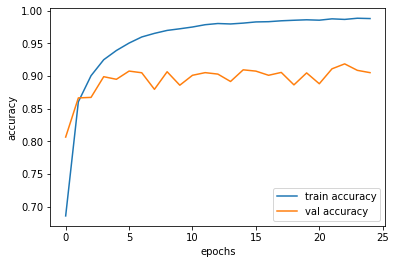

In [10]:
from matplotlib import pyplot as plt
import numpy as np 

epochs = list(range(25))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

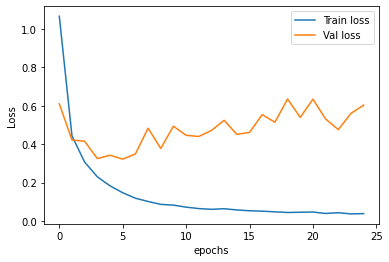

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
from keras.preprocessing import image

test_img = tf.keras.utils.load_img('D:/DS/Plant Disease Recognition/test/test/TomatoHealthy1.jpg',target_size = (64,64))
test_img = tf.keras.preprocessing.image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis = 0)
result = model0.predict(test_img)
result

1/1 [==============================] - 0s 15ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1.]], dtype=float32)

In [25]:
print(np.argmax(result))

37
